In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [7]:
def sumar_ganancias_repetidas(df):
    duplicated_index = df[df.index.duplicated()].index
    duplicated = df[df.index.duplicated(keep=False)]
    df = df.drop(duplicated_index, axis = 0)
    # print("Fechas repetidas: ", duplicated_index.values)
    for i in duplicated_index:
        suma_ganancia = duplicated.loc[i]['Ganancia'].sum()
        append_row = duplicated.loc[i].iloc[0]
        append_row['Ganancia'] = suma_ganancia
        df.append(append_row)
        
        
    return df

In [8]:
data = pd.read_excel('Registro_Excel.xlsx')
data.head()
print(data.shape)

(282, 10)


In [9]:
data = data.drop("Unnamed: 0", axis=1)
data['Ganancia'] = data['Ganancia'].astype(str)

In [10]:
ganancia = data[data['Ganancia'].str.isnumeric()]
ganancia['Ganancia'] = pd.to_numeric(ganancia['Ganancia']).astype('float')
ganancia = ganancia[ ganancia['Ganancia'] != 0 ]
ganancia['Fecha'] = pd.to_datetime(ganancia['Fecha'].dt.date.astype(str), format='%Y-%m-%d', utc=False)
ganancia = ganancia.set_index('Fecha')
ganancia['Mes'] = ganancia.index.month
ganancia['Dia'] = ganancia.index.day
ganancia['Dia Semana'] = ganancia.index.weekday_name
print(ganancia.shape)
print(ganancia.dtypes)
ganancia.head()

C:\Users\andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(68, 11)
Usuario         object
Bet365(COP)    float64
Wplay          float64
Codere         float64
Rushbet        float64
Retiros        float64
Total          float64
Ganancia       float64
Mes              int64
Dia              int64
Dia Semana      object
dtype: object


,Usuario,Bet365(COP),Wplay,Codere,Rushbet,Retiros,Total,Ganancia,Mes,Dia,Dia Semana
Fecha,,,,,,,,,,,
2019-12-22,Esteban SM,479402.0,711500.0,0.0,0.0,0.0,1190902.0,246359.0,12,22,Sunday
2019-12-22,Yusbay MD,0.0,1108000.0,0.0,0.0,0.0,1108000.0,64377.0,12,22,Sunday
2019-12-22,Esteban SM,0.0,739000.0,0.0,0.0,0.0,739000.0,62649.0,12,22,Sunday
2019-12-21,Yusbay MD,360738.0,863000.0,0.0,0.0,0.0,1223738.0,488240.0,12,21,Saturday
2019-12-19,Yusbay MD,453603.0,176938.0,0.0,0.0,0.0,630541.0,128056.0,12,19,Thursday


In [11]:
Yusbay = ganancia[ganancia['Usuario']=='Yusbay MD']
Esteban = ganancia[ganancia['Usuario']=='Esteban SM']
Andres = ganancia[ganancia['Usuario']=='Andres JG']

In [12]:
Esteban = sumar_ganancias_repetidas(Esteban)
Andres = sumar_ganancias_repetidas(Andres)
Yusbay = sumar_ganancias_repetidas(Yusbay)

In [13]:
Andres.shape

(20, 11)

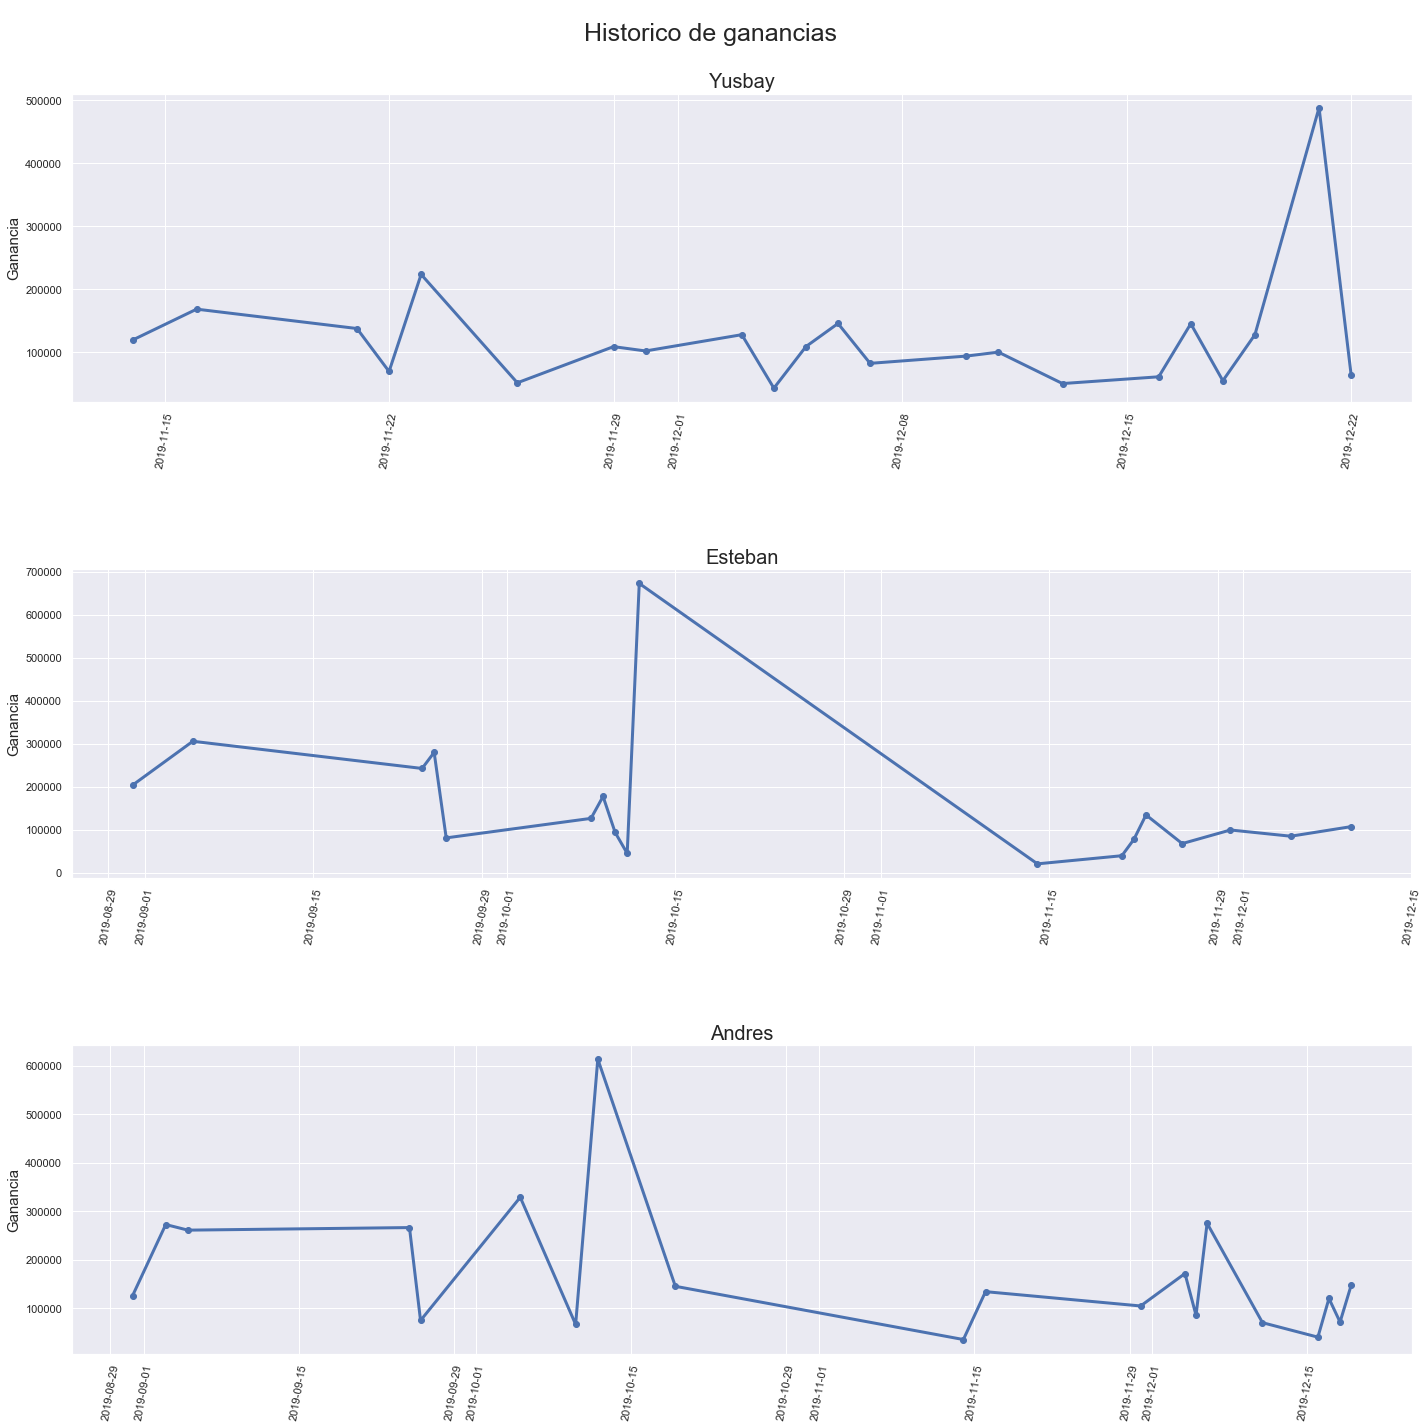

In [112]:
sujetos = ['Yusbay', 'Esteban', 'Andres']
df = [Yusbay, Esteban, Andres]
fig = plt.figure(figsize=(20,20))
plt.suptitle('Historico de ganancias \n', size=25)
for i in range(3):
    ax1 = fig.add_subplot(311+i)
    plt.xticks(rotation=80)
    plt.plot(df[i].index, df[i]['Ganancia'], '-o', linewidth=3);
    ax1.set_title('\n \n \n'+sujetos[i], fontsize=20)
    ax1.set_ylabel('Ganancia', fontsize = 15)
    fig.tight_layout()
    
plt.show()
fig.savefig('img/historico_ganancias.png', dpi = 200)

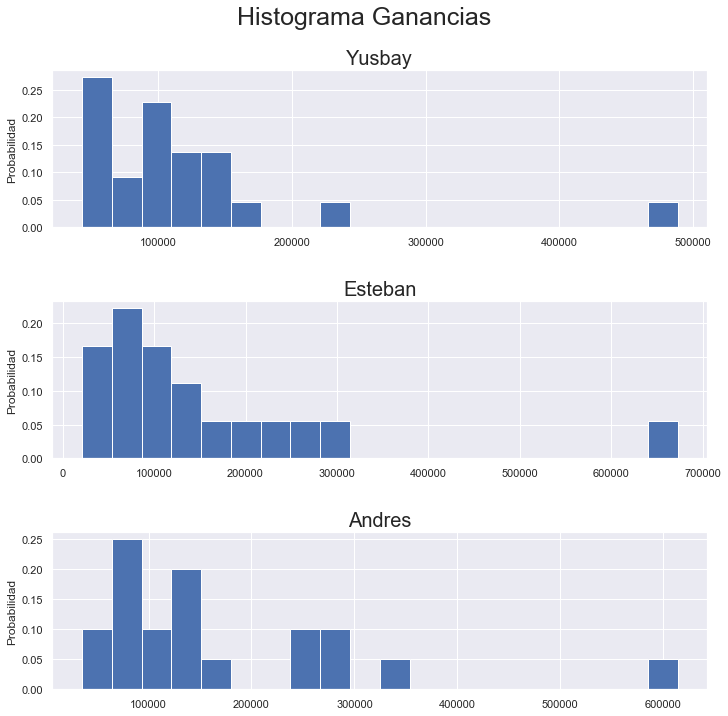

In [113]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), constrained_layout=True)
fig.suptitle('Histograma Ganancias', fontsize=25)
for i in range(3):
    a = df[i]['Ganancia']
    axs[i].hist(a, weights = np.ones_like(a)/len(a), bins=20);
    axs[i].set_title('\n'+sujetos[i], fontsize=20)
    axs[i].set_ylabel('Probabilidad')

plt.show()
fig.savefig('img/histograma_ganancias.png', dpi = 200)

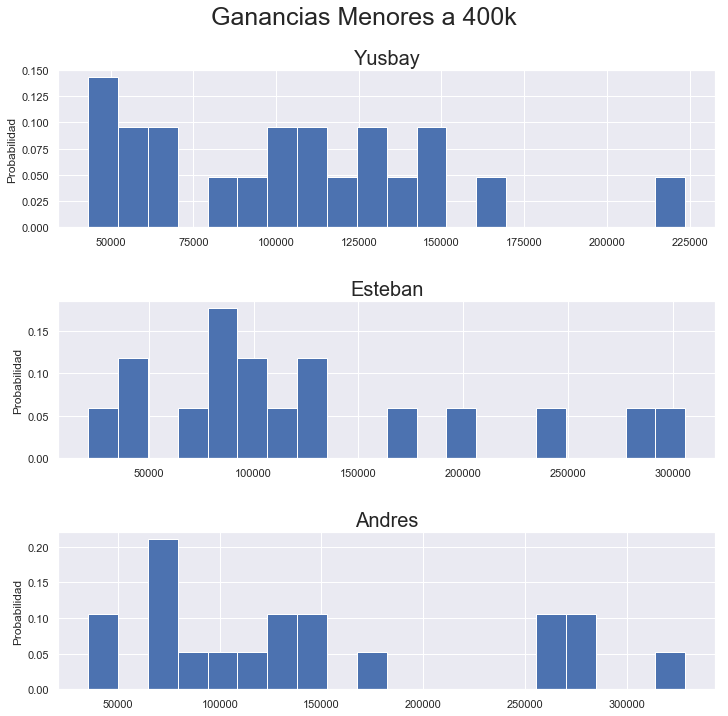

In [107]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), constrained_layout=True)
fig.suptitle('Ganancias Menores a 400k', fontsize=25)
for i in range(3):
    a = df[i][df[i]['Ganancia'] < 400000]['Ganancia']
    axs[i].hist(a, weights = np.ones_like(a)/len(a), bins=20);
    axs[i].set_title('\n'+sujetos[i], fontsize=20)
    axs[i].set_ylabel('Probabilidad')

plt.show()
fig.savefig('img/histograma_ganancias_men_400k.png', dpi = 600)

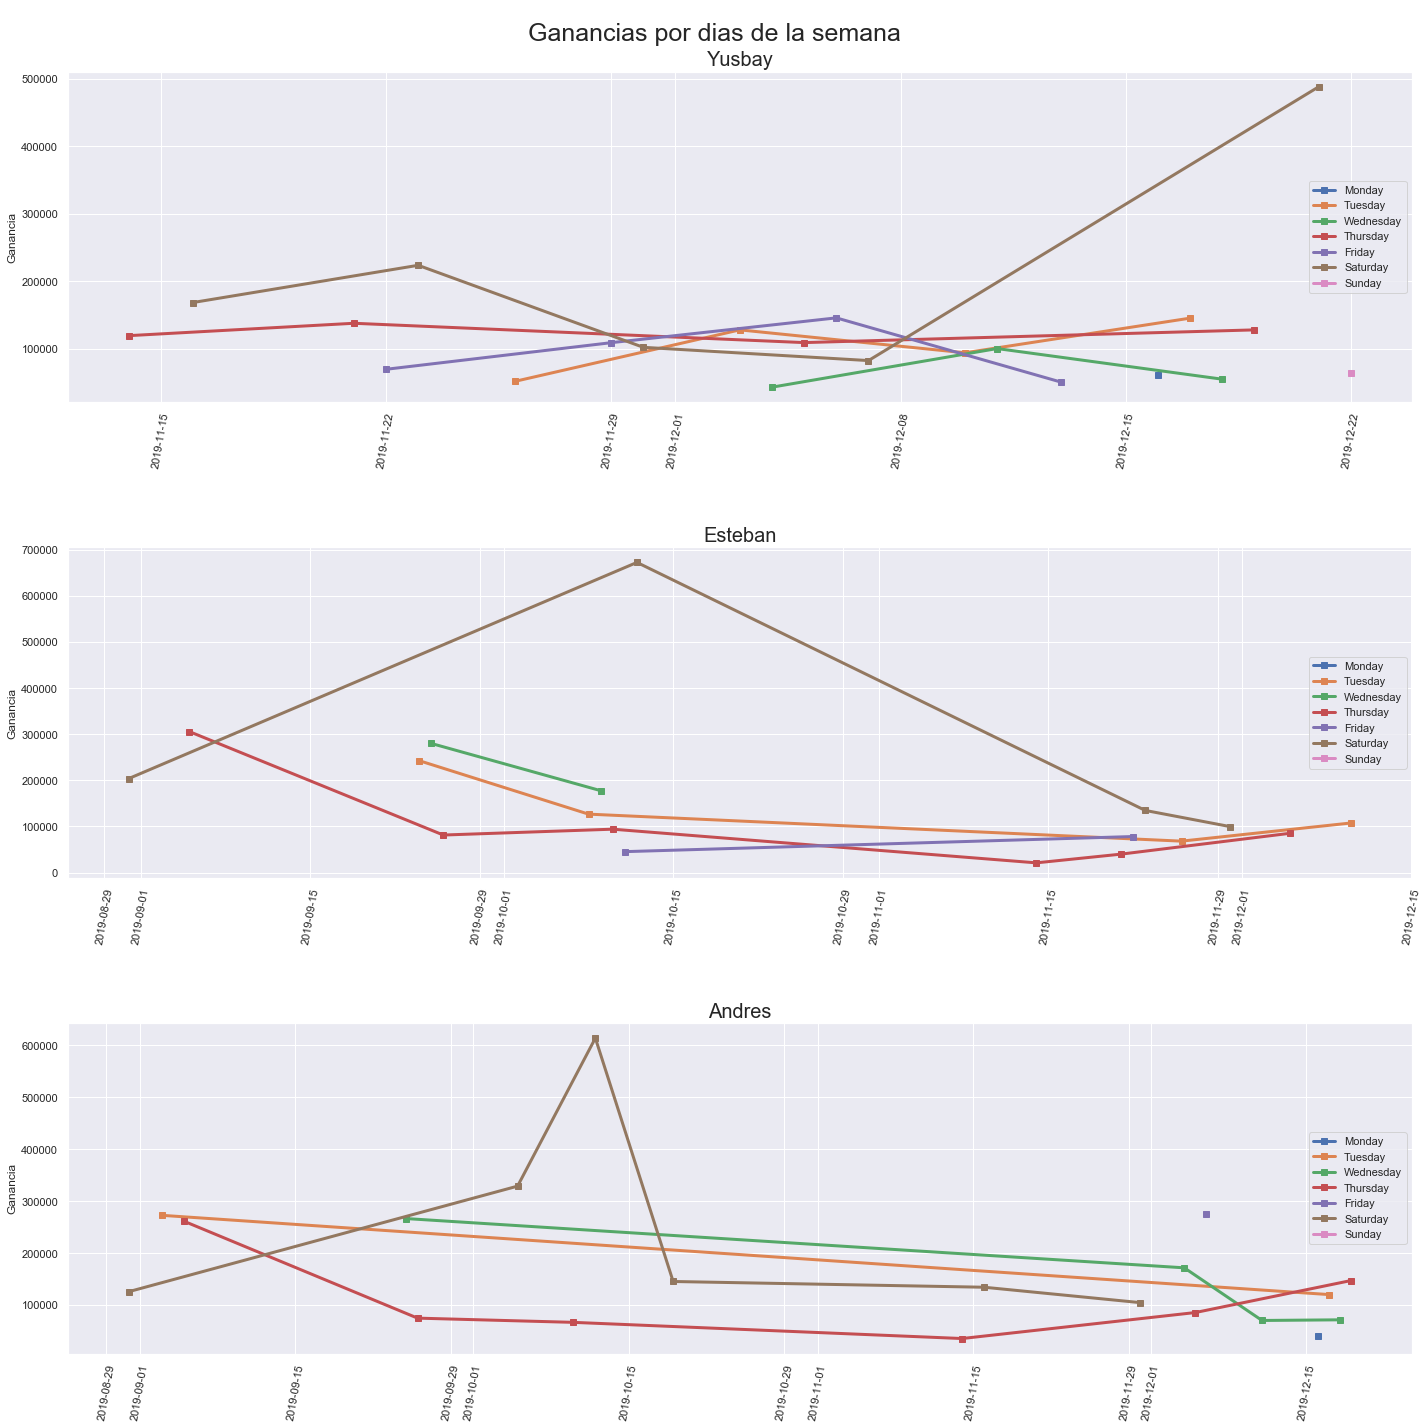

In [110]:
fig = plt.figure(figsize=(20,20))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in range(3):
    ax1 = fig.add_subplot(311+i)
    plt.xticks(rotation=80)
    # print(df[i][df[i]['Dia Semana'] == 'Friday'].index)
    for day_week in days:
        plt.plot(df[i][df[i]['Dia Semana'] == day_week].index, df[i][df[i]['Dia Semana'] == day_week]['Ganancia'], '-s', linewidth = 3);
    ax1.set_title('\n \n'+sujetos[i], fontsize=20)
    ax1.set_ylabel('Ganancia')
    plt.legend(days, loc='center right')
    fig.tight_layout()
    
plt.suptitle('Ganancias por dias de la semana', size=25)
plt.show()
fig.savefig('img/ganancia_dias.png', dpi = 200)

,Usuario,Bet365(COP),Wplay,Codere,Rushbet,Retiros,Total,Ganancia,Mes,Dia,Dia Semana
Fecha,,,,,,,,,,,
2019-12-06,Andres JG,1717728.0,350494.0,0.0,400.0,0.0,2068622.0,275172.0,12,6,Friday
